# Read GeoTIFF files with the `GeoTiff` class

This notebook describes how to open a GeoTIFF file
with the `GeoTiff` class included in the `bmi-geotiff` package.

## Setup

To ensure all dependencies are met, set up a conda environment using the environment file found in the root directory of this repository:
```
conda env create --file environment.yml
```

Then install the `bmi-geotiff` package:
```
pip install -e .
```

## Open a file

Import the `GeoTiff` class from the `bmi-geotiff` package:

In [1]:
from bmi_geotiff import GeoTiff

`GeoTiff` uses the open source [xarray](https://xarray.pydata.org), [rioxarray](https://corteva.github.io/rioxarray/stable/), and [rasterio](https://rasterio.readthedocs.io) packages to open, read, and store data and metadata from GeoTIFF files.

Create an instance of `GeoTiff`:

In [2]:
tif = GeoTiff()

The `GeoTiff` class can open local or remote files.
Here, we'll use the test file [RGB.byte.tif](https://github.com/rasterio/rasterio/raw/master/tests/data/RGB.byte.tif) from the rasterio project.
It's included in the examples directory of the [bmi-geotiff repository](https://github.com/csdms/bmi-geotiff),
but if you don't have it locally, click the link above to download it.

Open the file with the `GeoTiff` instance:

In [3]:
tif_file = "RGB.byte.tif"
tif.open(tif_file)

Note that a file can also be opened on instantiation, eliminating the call to `open`.

The data (and metadata) from the file are loaded into an `xarray` DataArray, which can be accessed through the `da` property.

In [4]:
tif.da

<xarray.DataArray (band: 3, y: 718, x: 791)>
[1703814 values with dtype=uint8]
Coordinates:
  * band         (band) int64 1 2 3
  * x            (x) float64 1.021e+05 1.024e+05 ... 3.389e+05 3.392e+05
  * y            (y) float64 2.827e+06 2.826e+06 ... 2.612e+06 2.612e+06
    spatial_ref  int64 0
Attributes:
    STATISTICS_MAXIMUM:  255
    STATISTICS_MEAN:     29.947726688477
    STATISTICS_MINIMUM:  0
    STATISTICS_STDDEV:   52.340921626611
    _FillValue:          0.0
    scale_factor:        1.0
    add_offset:          0.0
    units:               metre

Coordinate reference system information is stored in the `spatial_ref` non-dimensional coordinate:

In [5]:
tif.da.spatial_ref

<xarray.DataArray 'spatial_ref' ()>
array(0)
Coordinates:
    spatial_ref  int64 0
Attributes:
    crs_wkt:                           PROJCS["WGS 84 / UTM zone 18N",GEOGCS[...
    semi_major_axis:                   6378137.0
    semi_minor_axis:                   6356752.314245179
    inverse_flattening:                298.257223563
    reference_ellipsoid_name:          WGS 84
    longitude_of_prime_meridian:       0.0
    prime_meridian_name:               Greenwich
    geographic_crs_name:               WGS 84
    horizontal_datum_name:             World Geodetic System 1984
    projected_crs_name:                WGS 84 / UTM zone 18N
    grid_mapping_name:                 transverse_mercator
    latitude_of_projection_origin:     0.0
    longitude_of_central_meridian:     -75.0
    false_easting:                     500000.0
    false_northing:                    0.0
    scale_factor_at_central_meridian:  0.9996
    spatial_ref:                       PROJCS["WGS 84 / UTM zone 18N",GEOGCS[...
    GeoTransform:                      101985.0 300.0379266750948 0.0 2826915...

## Visualize

Let's visualize the data read from the file.
The steps below are based on [this example](http://xarray.pydata.org/en/stable/examples/visualization_gallery.html#imshow()-and-rasterio-map-projections) from the xarray visualization gallery.

In [6]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

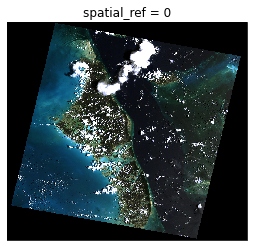

In [7]:
crs = ccrs.UTM('18', southern_hemisphere=False)
ax = plt.subplot(projection=crs)
tif.da.plot.imshow(ax=ax, rgb='band', transform=crs)

## Conclusion

The `GeoTiff` class does little more than wrap the existing functionality of xarray, rioxarray, and rasterio.
However, it provides a base class that can be wrapped with a [Basic Model Interface](https://bmi.readthedocs.io) (BMI) to create a [CSDMS data component](https://csdms.colorado.edu/wiki/DataComponents) that can be coupled with other components that also expose a BMI.

We'll explore this functionality in a [second notebook](bmi-geotiff.ipynb).